Gontang Ragil Prakasa, Teknik Informatika, Unversitas Ahmad Dahlan

<h3>k-Nearest Neighbour</h3>

<ul>
	<li>Classifier yang paling sederhana.</li>
	<li>Sering disebut sebagai <u><strong>Instance based Learner</strong></u></li>
</ul>

<p><img alt="" src="image/6_kNN.JPG" style="height:300px; width:711px" /></p>

<dl>
	<dt><strong>Pros:</strong></dt>
	<dd>
	<ul>
		<li>Relatif cepat (efisien) untuk data yang tidak terlalu besar</li>
		<li>Sederhana, mudah untuk diimplementasikan</li>
		<li>Mudah untuk di modifikasi: Berbagai macam formula jarak/similaritas</li>
		<li>Menangani data Multiclass dengan mudah</li>
		<li>Akurasi cukup baik jika data representatif</li>
	</ul>
	</dd>
	<dt><strong>Cons:</strong></dt>
	<dd>
	<ul>
		<li>Menemukan&nbsp;nearest neighbours tidak efisien untuk data besar</li>
		<li>Storage of data</li>
		<li>Meyakinkan rumus jarak yang tepat</li>
	</ul>
	</dd>
</dl>


In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [38]:
iris = datasets.load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [39]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [24]:
Atribut_Training, Atribut_Testing, Kelas_Training, Kelas_Testing = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

In [25]:
modelknn = KNeighborsClassifier(n_neighbors=5)
modelknn.fit(Atribut_Training, Kelas_Training)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
modelknn.predict(Atribut_Testing)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2])

In [27]:
modelknn.score(Atribut_Testing, Kelas_Testing)

0.95

## Tunggu dulu ... yang kita lakukan belum cukup valid/objektif ... Mengapa?

<h1>Cross Validation</h1>

<h1><img alt="" src="image/6_Cross_validation.png" style="height:274px; width:485px" /></h1>


In [28]:
from sklearn.model_selection import cross_val_score
import time
mulai = time.time()
akurasi_cross_val_score = cross_val_score(modelknn, iris.data, iris.target, cv=10)
waktu = time.time() - mulai
print("Accuracy SVM: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (akurasi_cross_val_score.mean(), akurasi_cross_val_score.std() * 2, waktu))

Accuracy SVM: 0.97 (+/- 0.09), Waktu = 0.026 detik


In [29]:
#Kemudian kita buat grafik tingkat score dari hasil cross_validation
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')

In [30]:
%matplotlib inline
import seaborn as sns
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


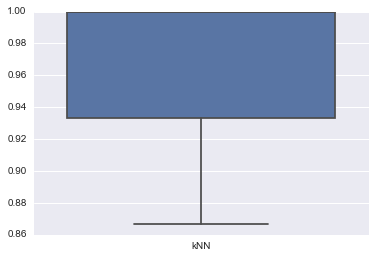

In [31]:
df = pd.DataFrame({'kNN':akurasi_cross_val_score})
sns.boxplot(data=df)
plt.show()

In [32]:
rerata_akurasi = akurasi_cross_val_score.mean()
rerata_akurasi

0.9666666666666668